CSV file downloaded successfully!


C:\Users\sonu kumar\AppData\Local\Temp\ipykernel_12044\2231509551.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_cat.show()
C:\Users\sonu kumar\AppData\Local\Temp\ipykernel_12044\2231509551.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_heat.show()


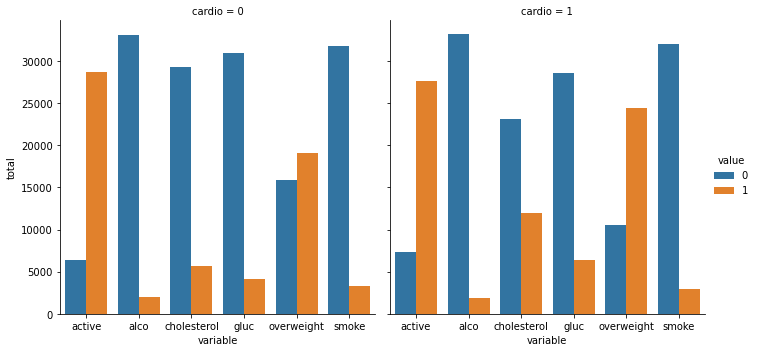

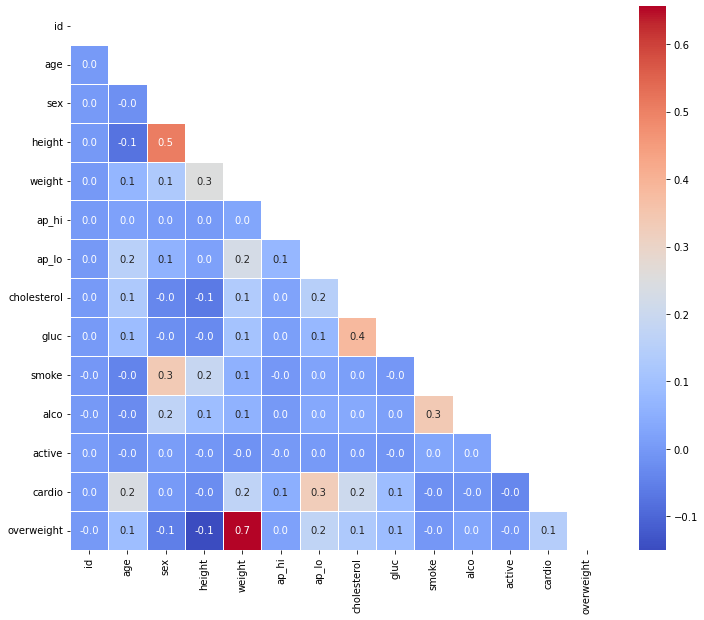

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 1: CSV File Download Karna
url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/main/medical_examination.csv"
filename = "medical_examination.csv"
urllib.request.urlretrieve(url, filename)
print("CSV file downloaded successfully!")

# 📌 Step 2: Dataset Load Karna
df = pd.read_csv("medical_examination.csv")

# 📌 Step 3: Overweight Column Add Karna
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns=['BMI'], inplace=True)  # BMI column hatana

# 📌 Step 4: Cholesterol & Glucose Normalize Karna
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# 📌 Step 5: Categorical Plot Function
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
    
    # Group aur count karna
    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

    # Seaborn ka catplot draw karna
    g = sns.catplot(x="variable", y="total", hue="value", col="cardio",
                    data=df_cat, kind="bar", height=5, aspect=1)

    fig = g.fig
    return fig

# 📌 Step 6: Heatmap Function
def draw_heat_map():
    # Data Cleaning
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Correlation Matrix Compute Karna
    corr = df_heat.corr()

    # Upper Triangle ke liye Mask Generate Karna
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Heatmap Plot Karna
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
    
    return fig

# 📌 Step 7: Testing
if __name__ == "__main__":
    fig_cat = draw_cat_plot()
    fig_cat.show()

    fig_heat = draw_heat_map()
    fig_heat.show()

